# Configuring
Besides being super convenient, ahlive is super customizable.

### keywords
Common settings can be accessed through documented keywords.

For a list of documented keywords, see `help(ah.Array)`.

In [ ]:
import ahlive as ah
ah.Array([0, 1, 2], [3, 4, 5], figsize=(3, 3)).render()

<div class="alert alert-warning">

Do not expect all the keywords exposed in ahlive to match the matplotlib keywords!
    
This is because some keywords are too generic in matplotlib, e.g. `plt.margins(x=1)` is exposed as `xmargins=1`

</div>

Any keywords not documented are assumed to be `plot` keywords.

For example in vanilla matplotlib, to change the marker type:

In [ ]:
import matplotlib.pyplot as plt
_ = plt.scatter([0], [3], marker='o')
_ = plt.scatter([1], [4], marker='^')
_ = plt.scatter([2], [5], marker='v')

Here, although `marker` is not documented in ahlive's docstring, it can still be used.

In [ ]:
import ahlive as ah
ah.Array([0, 1, 2], [3, 4, 5], marker=['o', '^', 'v']).render()

These `plot` keywords can be a scalar too.

In [ ]:
import ahlive as ah
ah.Array([0, 1, 2], [3, 4, 5], marker='^').render()

### config
However, because matplotlib is huge, not all keywords can be exposed. Instead, ahlive has a generic `config` method.

To set `figsize` without the built-in keyword, first pass the name of the method followed by the keyword arguments.

For example, to set `figsize` in vanilla matplotlib:

In [ ]:
import matplotlib.pyplot as plt
_ = plt.figure(figsize=(3, 3))

The method is `figure` so that will be the first positional argument passed to `config`, and then the keyword argument is `figsize=(3, 3)`.

In [ ]:
import ahlive as ah
arr = ah.Array([0, 1, 2], [3, 4, 5])
arr.config('figure', figsize=(3, 3)).render()

Or another way of doing this is to pass a nested dictionary; this way, multiple methods can be configured simultaneously.

In [ ]:
import ahlive as ah
arr = ah.Array([0, 1, 2], [3, 4, 5])
arr.config(**{
    'figure': {'figsize': (3, 3)},
    'axes': {'xlim': [0, 4], 'ylim': [0, 10]}
}).render()

However not all methods are named exactly as their matplotlib counterpart!

For example to set `color` in vanilla matplotlib:

In [ ]:
import matplotlib.pyplot as plt
plt.scatter([0, 1, 2], [3, 4, 5], color='red')

The method is not `scatter` in ahlive, instead it's `plot`! This is so that ahlive can handle `plot`, `scatter`, `bar`, etc. without too complex internal code.

In [ ]:
import ahlive as ah
arr = ah.Array([0, 1, 2], [3, 4, 5])
arr.config('plot', color='red').render()

Furthermore, methods are often prefixed: `ref_` for references, `grid_` for grids, `remark_` for remarks, etc.

In [ ]:
import ahlive as ah
arr = ah.Reference([0, 1, 2])
arr.config('ref_plot', color='red').render()

To get a full list of configurable methods:

In [ ]:
import ahlive as ah
for key, val in ah.CONFIGURABLES.items():
    print(f"{key}\n{val}\n")

### hooks
Still, there's lots to be desired that ahlive is incapable of doing. Therefore, if there's a need, things can be done the vanilla matplotlib way first and wrapped into a function listed in `hooks`.

In [ ]:
import ahlive as ah
import matplotlib.pyplot as plt
import numpy as np

def add_twinx(fig, ax):
    ax2 = ax.twinx()
    ax2.set_ylabel('The twin axes')
    ax2.set_ylim(0, 24)

ah.Array([0, 1], [0, 12], hooks=[add_twinx]).render()

<div class="alert alert-info">

`hooks` accept multiple custom functions.

</div>

### style

Setting `style='minimal'` reduces the number of tick labels and grid lines.

In [ ]:
import ahlive as ah
ah.Array([0, 1, 2], [3, 4, 5], style='minimal').render()

Setting `style='bare'` removes all tick labels, grid lines, borders, and spacing around the subplot.

In [ ]:
import ahlive as ah
ah.Array([0, 1, 2], [3, 4, 5], style='bare').render()

### defaults

To get a full list of configurable defaults:

In [ ]:
import ahlive as ah
for key, val in ah.DEFAULTS.items():
    print(f"{key}\n{val}\n")

To set, or update, defaults, specify the relevant key as a positional argument, and the desired keyword arguments.

Here, the the final and transition frames' `durations`, or lag, is updated to 3 and 0.25 seconds respectively.

In [ ]:
import ahlive as ah

ah.config_defaults("durations", final_frame=3, transition_frames=0.1)

ah.Array([0, 1, 2], [3, 4, 5]).render()

Or equivalently; emphasis on the double asterisks if done this way!

```python
import ahlive as ah

ah.config_defaults("durations", **{'final_frame': 3, 'transition_frames': 0.1})

ah.Array([0, 1, 2], [3, 4, 5]).render()
```

Or another way of doing this is to pass a nested dictionary; this way, multiple default keys can be configured simultaneously. The `_kwds` suffix is optional.

durations_kwds {'durations_kwds': {'final_frame': 5, 'transition_frames': 0.5}, 'plot': {'scatter': {'color': 'red', 's': 1000}}}
plot_kwds {'durations_kwds': {'final_frame': 5, 'transition_frames': 0.5}, 'plot': {'scatter': {'color': 'red', 's': 1000}}}
[########################################] | 100% Completed |  4.3s



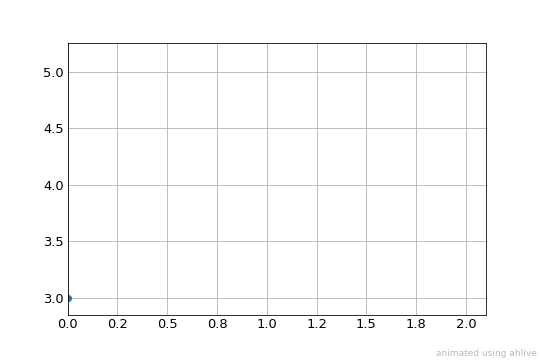

In [1]:
import ahlive as ah

ah.config_defaults(**{
    "durations_kwds": dict(final_frame=5, transition_frames=0.5),
    "plot": {"scatter": dict(color="red", s=1000)}
})

ah.Array([0, 1, 2], [3, 4, 5]).render()

<div class="alert alert-warning">

Note that some defaults require an extra layer of nesting, with the keys as the name of the `chart`, like for `plot_kwds`, `ref_plot_kwds`, `preset_kwds`.

</div>

The new defaults will persist the entire session until restarted.

In [ ]:
ah.Array([0, 1, 0], [6, -1, 2]).render()